## 1. IMPORTING LIBRARIES

In [81]:
# Basic Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import uniform, randint
# FEATURE ENGINNERING
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

# MODELLING
from sklearn.model_selection import GridSearchCV, train_test_split ,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor , AdaBoostRegressor ,RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error



# WARNINGS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

## 2. READING AND CHECKING DATA 

In [170]:
# Reading data
df = pd.read_csv('final_data.csv')

In [83]:
# Get first 5 lines of dataset
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [84]:
# Columns in data
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [85]:
# Shape of data
df.shape

(10754, 22)

In [86]:
# Checking data types of all features
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [87]:
# Checking for null values 
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [88]:
# Check for duplicates
df.duplicated().sum()

0

In [89]:
# Checking our numerical columns
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


## 3. CORELATION MATRIX

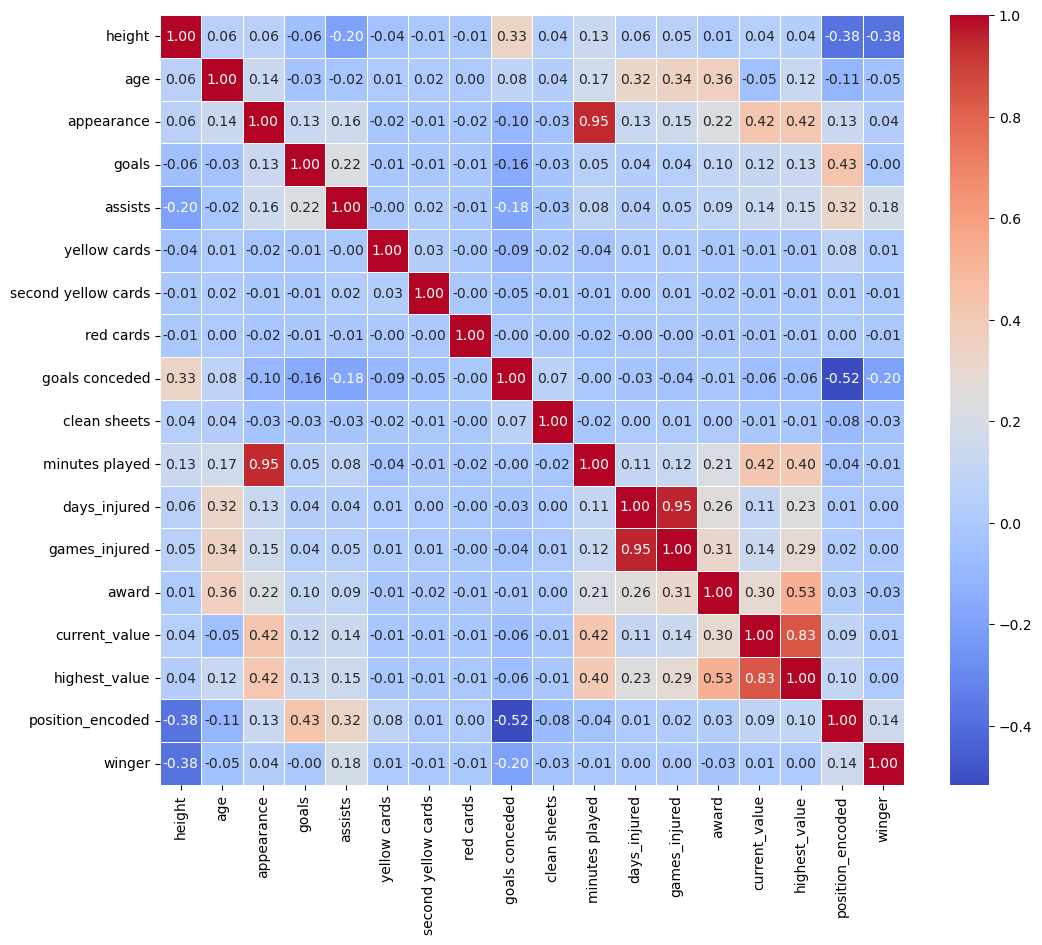

In [90]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()


## 4. DROPPING UNNECESSARY COLUMNS 

To build a model for predicting player transfer fees with the target variable being 'highest_value', you need to consider which features (columns) in your dataset could be relevant for this prediction task. Here's a brief analysis of the columns provided:

1. **player**: This column is likely to be a unique identifier for each player and may not contribute directly to predicting transfer fees. You may want to exclude it.
-----------------------------------------------------------------------------------------------------------------
2. **team**: The team a player is currently part of might have an impact on the transfer fee. Team performance, league, and other factors associated with the team could be relevant.
-----------------------------------------------------------------------------------------------------------------
3. **name**: Similar to the 'player' column, the player's name is likely unique and may not directly contribute to the prediction.
-----------------------------------------------------------------------------------------------------------------
4. **position**: The player's position is often a crucial factor in determining transfer fees. Different positions have different market values.
-----------------------------------------------------------------------------------------------------------------
5. **height**: While height might not have a direct impact and also have low corelation.
-----------------------------------------------------------------------------------------------------------------
6. **age**: Age is a crucial factor. Younger players with potential may command higher transfer fees.
-----------------------------------------------------------------------------------------------------------------
7. **appearance**, **goals**, **assists**, **yellow cards**, **red cards**, etc.: These contain many null values so not taking in consideration.
-----------------------------------------------------------------------------------------------------------------
8. **clean sheets**, **goals conceded**: These contain many null values so not taking in consideration.
-----------------------------------------------------------------------------------------------------------------
9. **minutes played**: This could be an important factor, especially if it reflects consistent playing time.
-----------------------------------------------------------------------------------------------------------------
10. **days_injured**, **games_injured**: Injuries might negatively impact a player's transfer value , Since both represent same thing we will take only one column .
-----------------------------------------------------------------------------------------------------------------
11. **award**: Winning awards or being nominated could positively impact a player's value.
-----------------------------------------------------------------------------------------------------------------
12. **current_value**: This is likely to be a strong predictor as it represents the current estimated value of the player.
-----------------------------------------------------------------------------------------------------------------
13. **winger**: It does not seem helpful as most of them are 0 and it can cause overfitting and its corelationn is also low . 


In [91]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [92]:
df.drop(['player','name','height','goals','assists','yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets','days_injured','position_encoded' ,'winger'] , axis=1 , inplace=True)

In [93]:
# These are important columns
df.columns

Index(['team', 'position', 'age', 'appearance', 'minutes played',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [94]:
df.head()

# Input Variable : team', 'position', 'age', 'appearance', 'minutes played', 'games_injured', 'award', 'current_value'
# Target variable : 'highes_value'

,team,position,age,appearance,minutes played,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,32.0,104,9390,5,13,15000000,70000000
1,Manchester United,Goalkeeper,30.0,15,1304,58,1,1500000,22000000
2,Manchester United,Goalkeeper,37.0,4,292,84,4,600000,6000000
3,Manchester United,Defender Centre-Back,25.0,82,6408,22,9,50000000,50000000
4,Manchester United,Defender Centre-Back,30.0,63,5031,51,21,40000000,80000000


## 5. Feature Engineering and Data Visualization 

### (a). Team Column

In [95]:
df['team'].value_counts()

Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: team, Length: 374, dtype: int64

In [96]:
len(df['team'].unique())
# 374 teams are there

374

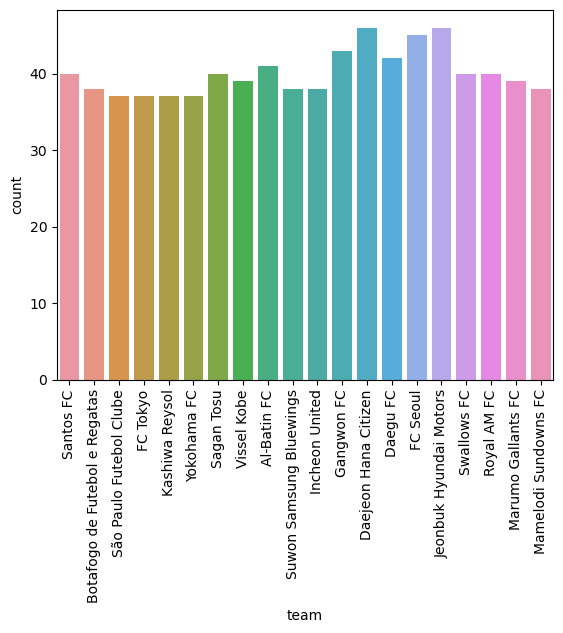

In [97]:
# Visualizing only top 20 teams  
top_categories = df['team'].value_counts().nlargest(20).index
filtered_data = df[df['team'].isin(top_categories)]


sns.countplot(x='team', data=filtered_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Doing One-Hot Encoding and only selecting top 20 teams and markin rest as 'Others'

In [172]:
top_n_teams = df['team'].value_counts().nlargest(20).index
df['team_encoded'] = df['team'].apply(lambda x: x if x in top_n_teams else 'Other')

In [173]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'position' is the column you want to label encode
column_to_encode = 'team_encoded'

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specified column
df[column_to_encode] = label_encoder.fit_transform(df[column_to_encode])


In [174]:
label_encoder.classes_

array(['Al-Batin FC', 'Botafogo de Futebol e Regatas', 'Daegu FC',
       'Daejeon Hana Citizen', 'FC Seoul', 'FC Tokyo', 'Gangwon FC',
       'Incheon United', 'Jeonbuk Hyundai Motors', 'Kashiwa Reysol',
       'Mamelodi Sundowns FC', 'Marumo Gallants FC', 'Other',
       'Royal AM FC', 'Sagan Tosu', 'Santos FC',
       'Suwon Samsung Bluewings', 'Swallows FC',
       'São Paulo Futebol Clube', 'Vissel Kobe', 'Yokohama FC'],
      dtype=object)

In [171]:
df['team'].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [103]:
df.columns

Index(['team', 'position', 'age', 'appearance', 'minutes played',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_encoded'],
      dtype='object')

In [104]:
df.head()

,team,position,age,appearance,minutes played,games_injured,award,current_value,highest_value,team_encoded
0,226,Goalkeeper,32.0,104,9390,5,13,15000000,70000000,12
1,226,Goalkeeper,30.0,15,1304,58,1,1500000,22000000,12
2,226,Goalkeeper,37.0,4,292,84,4,600000,6000000,12
3,226,Defender Centre-Back,25.0,82,6408,22,9,50000000,50000000,12
4,226,Defender Centre-Back,30.0,63,5031,51,21,40000000,80000000,12


TEAM COLUMN ----- > DONE✅

### (b). Position Column 

In [105]:
df['position'].value_counts()

Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: position, dtype: int64

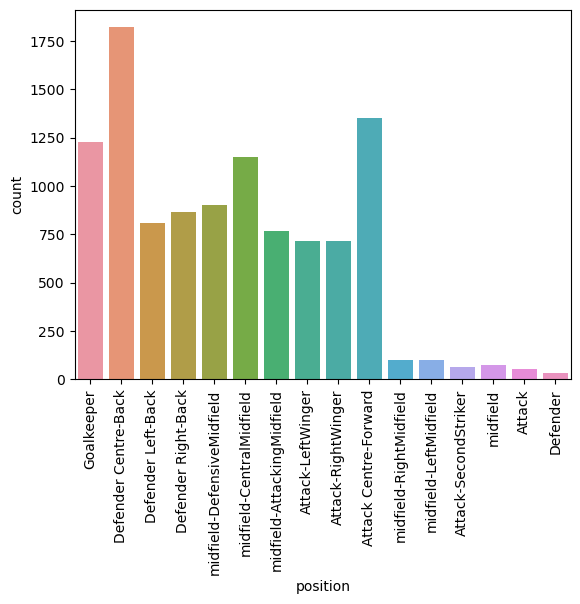

In [106]:
sns.countplot(x='position', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Above we can see that last 5 category have very less number and if we create multiple features onto  them it can cause sparsity in our model . So we will combine last 5 of them into a one category that is "Other"

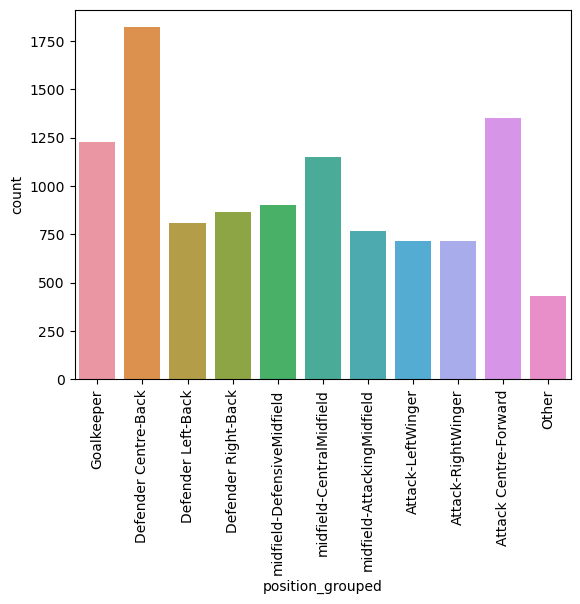

In [107]:
category_counts = df['position'].value_counts()

categories_to_group = category_counts[category_counts < 500].index

df['position_grouped'] = df['position'].replace(categories_to_group, 'Other')

sns.countplot(x='position_grouped', data=df)
plt.xticks(rotation=90)
plt.show()

Now it look a lot better than previous one .
Now we will be label encoding them manually

In [108]:
df['position_grouped'].value_counts()

Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
Other                          428
Name: position_grouped, dtype: int64

In [109]:
# Perform label encoding
label_encoder = LabelEncoder()
df['position_encoded'] = label_encoder.fit_transform(df['position_grouped'])

In [110]:
df.shape

(10754, 12)

In [111]:
df.columns

Index(['team', 'position', 'age', 'appearance', 'minutes played',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_encoded', 'position_grouped', 'position_encoded'],
      dtype='object')

In [112]:
df['position_encoded'].value_counts()

3     1821
0     1353
6     1229
9     1149
10     900
5      867
4      807
8      769
2      717
1      714
7      428
Name: position_encoded, dtype: int64

POSITION COLUMN ----- > DONE✅

### (c) . Age Column

In [113]:
df['age'].describe()

count    10754.000000
mean        26.041903
std          4.777629
min         15.000000
25%         22.000000
50%         26.000000
75%         29.000000
max         43.000000
Name: age, dtype: float64

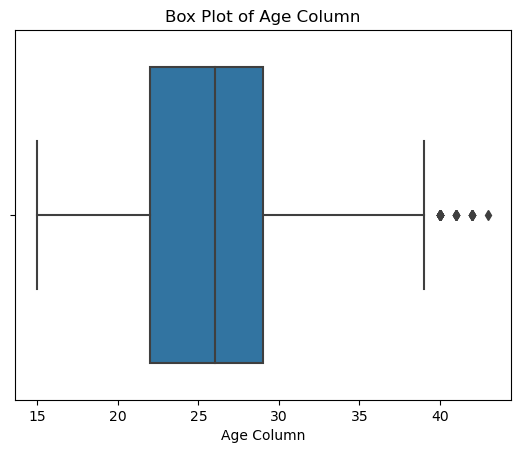

In [114]:
sns.boxplot(df['age'])
plt.xlabel('Age Column')
plt.title('Box Plot of Age Column')
plt.show()

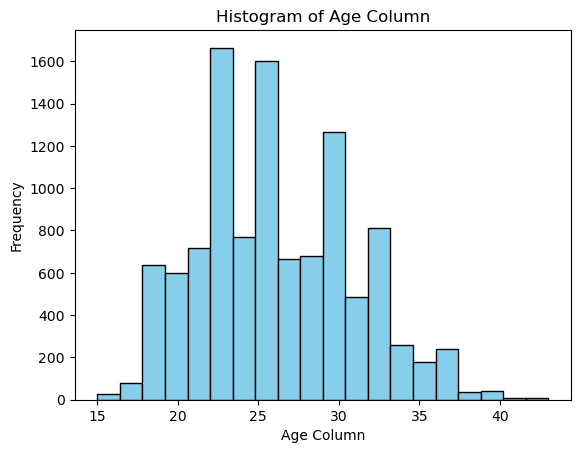

In [115]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age Column')
plt.ylabel('Frequency')
plt.title('Histogram of Age Column')
plt.show()


 It is close to normal distribution so no need of any transformation to this column later we will apply standardization and also outliers are not much 

In [116]:
skewness = skew(df['age'])
print(f'Skewness of the column: {skewness}')

Skewness of the column: 0.35392068116849695


AGE COLUMN ----- > DONE✅

## (d). Appearance Column 

In [117]:
df['appearance'].describe()

count    10754.000000
mean        36.407011
std         26.526541
min          0.000000
25%         12.000000
50%         35.000000
75%         59.000000
max        107.000000
Name: appearance, dtype: float64

In [118]:
df['appearance'].value_counts()

0      389
1      333
4      225
17     221
10     216
      ... 
98       3
107      3
106      2
104      2
103      1
Name: appearance, Length: 108, dtype: int64

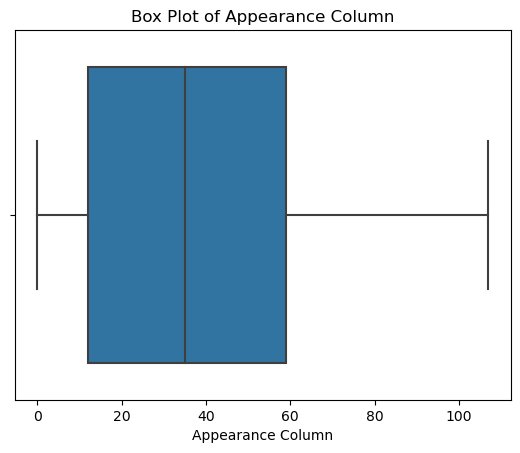

In [119]:
sns.boxplot(df['appearance'])
plt.xlabel('Appearance Column')
plt.title('Box Plot of Appearance Column')
plt.show()

# No outliers

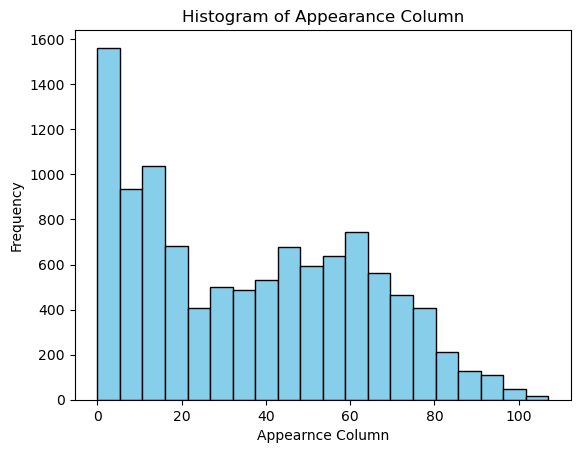

In [120]:
plt.hist(df['appearance'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Appearnce Column')
plt.ylabel('Frequency')
plt.title('Histogram of Appearance Column')
plt.show()


Here we can say most cokumns have 0 appearance so we have to check what is the matter going there .

In [121]:
zero_appearance_rows = df[df['appearance'] == 0]
pd.DataFrame(zero_appearance_rows)

# Now we know these were null values 

,team,position,age,appearance,minutes played,games_injured,award,current_value,highest_value,team_encoded,position_grouped,position_encoded
189,137,Goalkeeper,39.0,0,0,32,3,200000,700000,12,Goalkeeper,6
322,8,Goalkeeper,36.0,0,0,18,1,500000,4500000,12,Goalkeeper,6
349,61,Goalkeeper,20.0,0,0,0,0,500000,500000,12,Goalkeeper,6
565,355,Goalkeeper,27.0,0,0,24,3,100000,100000,12,Goalkeeper,6
620,1,Goalkeeper,29.0,0,0,22,2,250000,800000,12,Goalkeeper,6
...,...,...,...,...,...,...,...,...,...,...,...,...
10650,230,Goalkeeper,19.0,0,0,0,0,25000,25000,12,Goalkeeper,6
10660,230,midfield,19.0,0,0,0,0,25000,25000,12,Other,7
10663,230,midfield-LeftMidfield,17.0,0,0,0,0,25000,25000,12,Other,7
10673,230,Attack Centre-Forward,18.0,0,0,12,0,25000,25000,12,Attack Centre-Forward,0


In [122]:
# Replace zeros with the median
median_appearance = df['appearance'].median()
print(median_appearance)
df['appearance_median'] = df['appearance'].replace(0, median_appearance)

35.0


In [123]:
zero_appearance_rows = df[df['appearance_median'] == 0]
pd.DataFrame(zero_appearance_rows)

# Fixed this by replacing it with median values

,team,position,age,appearance,minutes played,games_injured,award,current_value,highest_value,team_encoded,position_grouped,position_encoded,appearance_median


In [124]:
skewness = skew(df['appearance'])
print(f'Skewness of the column: {skewness}')

Skewness of the column: 0.2875190377527348


In [125]:
skewness = skew(df['appearance_median'])
print(f'Skewness of the column: {skewness}')

Skewness of the column: 0.27645811753227995


APPEARNCE COLUMN ----- > DONE✅

### (e) Minutes Played Column 

In [126]:
df['minutes played'].describe()

count    10754.000000
mean      2470.789381
std       2021.703271
min          0.000000
25%        660.000000
50%       2101.500000
75%       3968.000000
max       9510.000000
Name: minutes played, dtype: float64

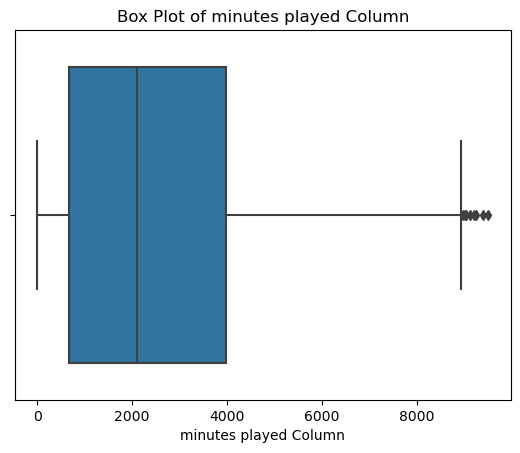

In [127]:
sns.boxplot(df['minutes played'])
plt.xlabel('minutes played Column')
plt.title('Box Plot of minutes played Column')
plt.show()

# there are outliers

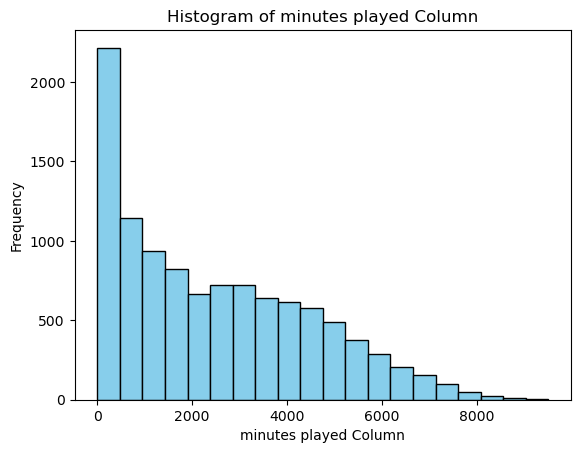

In [128]:
plt.hist(df['minutes played'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('minutes played Column')
plt.ylabel('Frequency')
plt.title('Histogram of minutes played Column')
plt.show()


Same here most of values are zero so we will be imputing them with median 

In [129]:
non_zero_median = df[df['minutes played'] > 0]['minutes played'].median()

# Replace zeros with the median of non-zero values
df['minutes_played_median'] = df['minutes played'].replace(0, non_zero_median)

In [130]:
df['minutes_played_median'].value_counts()

2238    407
90       98
180      41
1530     39
450      37
       ... 
1718      1
8411      1
6621      1
6369      1
820       1
Name: minutes_played_median, Length: 5035, dtype: int64

In [131]:
df['minutes played'].value_counts()

0       405
90       98
180      41
1530     39
450      37
       ... 
1718      1
8411      1
6621      1
6369      1
820       1
Name: minutes played, Length: 5036, dtype: int64

Now we have to  deal with outliers and our data is also rif=ght skewed

In [132]:
skewness = skew(df['minutes_played_median'])
print(f'Skewness of the column: {skewness}')

Skewness of the column: 0.636191191534911


In [133]:
from scipy.stats import boxcox
# Box-Cox transformation
df['minutes_played_boxcox'],lamda_value = boxcox(df['minutes_played_median'] + 1)

In [134]:
lamda_value

0.4469754727550972

In [135]:
skewness = skew(df['minutes_played_boxcox'])
print(f'Skewness of the column: {skewness}')

Skewness of the column: -0.20614137941870347


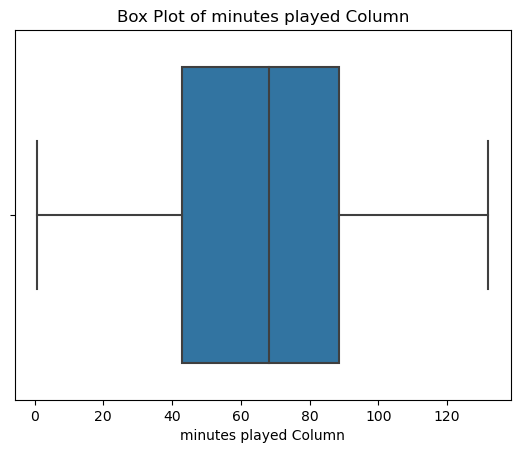

In [136]:
sns.boxplot(df['minutes_played_boxcox'])
plt.xlabel('minutes played Column')
plt.title('Box Plot of minutes played Column')
plt.show()

# there are outliers

Outliers removed 

 Minutes Played Column ----> Done ✅ 

### (f). Games Injured

In [137]:
df['games_injured'].value_counts()

0      4227
2       277
4       252
3       250
1       247
       ... 
201       1
136       1
169       1
168       1
146       1
Name: games_injured, Length: 154, dtype: int64

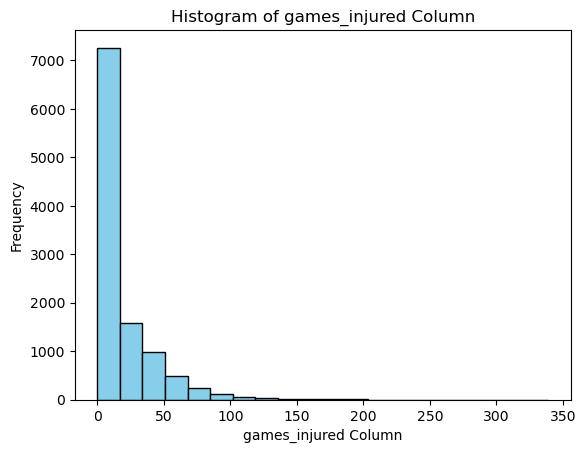

In [138]:
plt.hist(df['games_injured'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('games_injured Column')
plt.ylabel('Frequency')
plt.title('Histogram of games_injured Column')
plt.show()


In [139]:
df['games_injured_binary'] = np.where(df['games_injured'] == 0, 0, 1)

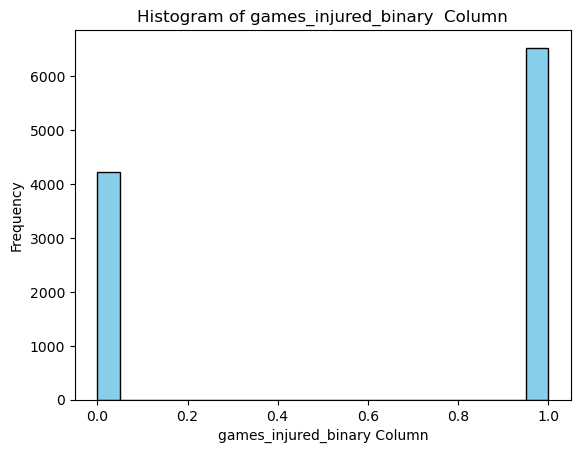

In [140]:
plt.hist(df['games_injured_binary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('games_injured_binary Column')
plt.ylabel('Frequency')
plt.title('Histogram of games_injured_binary  Column')
plt.show()


I have converted column like if a player is injured it is 1 else it is 0 

### (g). Award Column

In [141]:
df['award'].value_counts()

0     4773
1     2211
2     1223
3      730
4      460
5      323
6      216
7      199
8      121
9      110
10      72
11      61
13      42
12      35
14      35
15      21
17      16
18      16
16      13
19      11
20      11
33       6
22       6
21       4
25       4
24       4
26       4
23       3
35       2
36       2
29       2
27       2
32       2
37       2
31       1
42       1
28       1
92       1
34       1
30       1
57       1
65       1
53       1
38       1
43       1
90       1
Name: award, dtype: int64

Doing same with this column also 

In [142]:
df['award_binary'] = np.where(df['award'] == 0, 0, 1)

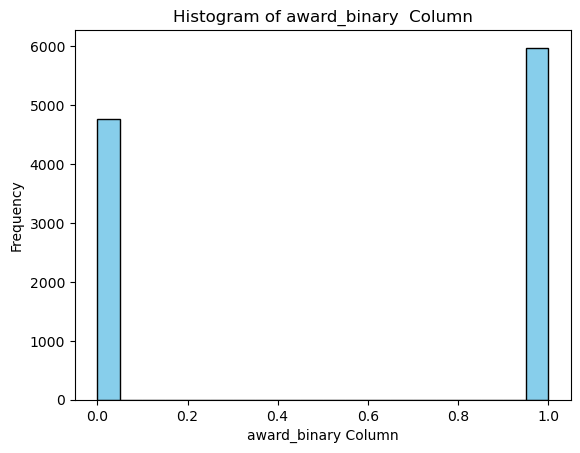

In [143]:
plt.hist(df['award_binary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('award_binary Column')
plt.ylabel('Frequency')
plt.title('Histogram of award_binary  Column')
plt.show()


### (h). Current Value Column 

In [144]:
df['current_value'].value_counts()

1000000      473
300000       456
500000       441
50000        422
1500000      412
            ... 
23000000       1
180000000      1
925000         1
5800000        1
150000000      1
Name: current_value, Length: 128, dtype: int64

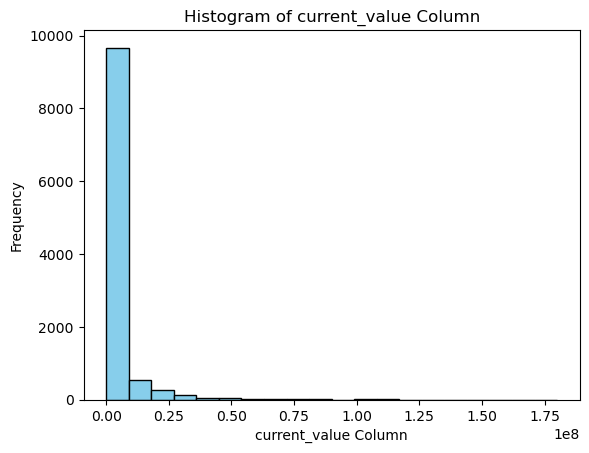

In [145]:
plt.hist(df['current_value'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('current_value Column')
plt.ylabel('Frequency')
plt.title('Histogram of current_value Column')
plt.show()


In [146]:
# Dropping zero values as they are less
zero_value_players = df[df['current_value'] == 0]
zero_value_players

,team,position,age,appearance,minutes played,games_injured,award,current_value,highest_value,team_encoded,position_grouped,position_encoded,appearance_median,minutes_played_median,minutes_played_boxcox,games_injured_binary,award_binary
29,226,Attack-RightWinger,21.000000,24,1700,12,0,0,50000000,12,Attack-RightWinger,2,24,1700,59.958661,1,0
406,242,Defender Centre-Back,23.000000,76,6560,19,4,0,0,12,Defender Centre-Back,3,76,6560,111.475264,1,1
407,242,Defender Centre-Back,31.000000,67,5911,30,3,0,0,12,Defender Centre-Back,3,67,5911,106.302558,1,1
408,242,Defender Centre-Back,29.000000,38,2609,57,2,0,0,12,Defender Centre-Back,3,38,2609,73.075891,1,1
409,242,Defender Left-Back,27.000000,54,3790,66,0,0,0,12,Defender Left-Back,4,54,3790,86.750746,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,63,Defender Left-Back,19.000000,0,0,0,0,0,0,12,Defender Left-Back,4,35,2238,68.087511,0,0
10586,63,midfield,17.000000,0,0,0,0,0,0,12,Other,7,35,2238,68.087511,0,0
10587,63,midfield,26.041903,0,0,0,0,0,0,12,Other,7,35,2238,68.087511,0,0
10686,328,midfield-DefensiveMidfield,19.000000,1,3,0,0,0,0,12,midfield-DefensiveMidfield,10,1,3,1.920146,0,0


In [147]:

zero_value_players = df[df['current_value'] == 0]

indices_to_drop = zero_value_players.index

df.drop(indices_to_drop, inplace=True)


In [148]:
# Checking 
zero_value_players = df[df['current_value'] == 0]
zero_value_players

,team,position,age,appearance,minutes played,games_injured,award,current_value,highest_value,team_encoded,position_grouped,position_encoded,appearance_median,minutes_played_median,minutes_played_boxcox,games_injured_binary,award_binary


### ALLL DATA CLEANING AND TRANSFORMATION  FEATURE ENGINEERING DONE ✅

In [149]:
df.head()

,team,position,age,appearance,minutes played,games_injured,award,current_value,highest_value,team_encoded,position_grouped,position_encoded,appearance_median,minutes_played_median,minutes_played_boxcox,games_injured_binary,award_binary
0,226,Goalkeeper,32.0,104,9390,5,13,15000000,70000000,12,Goalkeeper,6,104,9390,131.244235,1,1
1,226,Goalkeeper,30.0,15,1304,58,1,1500000,22000000,12,Goalkeeper,6,15,1304,53.010897,1,1
2,226,Goalkeeper,37.0,4,292,84,4,600000,6000000,12,Goalkeeper,6,4,292,26.099203,1,1
3,226,Defender Centre-Back,25.0,82,6408,22,9,50000000,50000000,12,Defender Centre-Back,3,82,6408,110.290116,1,1
4,226,Defender Centre-Back,30.0,63,5031,51,21,40000000,80000000,12,Defender Centre-Back,3,63,5031,98.758602,1,1


Removing columns that we dont need as we have transformed them 

In [151]:
df.drop(['minutes_played_median'  ,'position_grouped' , 'team' , 'position' ,'appearance' ,'minutes played' , 'games_injured' ,'award' ] , axis=1 , inplace=True)

In [152]:
df.shape

(10587, 9)

In [154]:
df.head()

,age,current_value,highest_value,team_encoded,position_encoded,appearance_median,minutes_played_boxcox,games_injured_binary,award_binary
0,32.0,15000000,70000000,12,6,104,131.244235,1,1
1,30.0,1500000,22000000,12,6,15,53.010897,1,1
2,37.0,600000,6000000,12,6,4,26.099203,1,1
3,25.0,50000000,50000000,12,3,82,110.290116,1,1
4,30.0,40000000,80000000,12,3,63,98.758602,1,1


In [153]:
df.to_csv("final_data_encoded.csv",index=False)

## 6. MODEL MAKING 

### Firstly testing all models to see which is giving good results then will be finetuning that model

In [155]:
# Defining our input and target features
X = df.drop('highest_value', axis=1)
y = df['highest_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardizinng them
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize regressor models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'XGBoost Regressor': XGBRegressor(objective='reg:squarederror', random_state=42),
    'LightGBM Regressor': LGBMRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(random_state=42, verbose=False)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model using RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE
    print(f'{model_name}: Root Mean Squared Error (RMSE): {rmse}')


Linear Regression: Root Mean Squared Error (RMSE): 7141751.937373303
Ridge Regression: Root Mean Squared Error (RMSE): 7141701.507417808
Lasso Regression: Root Mean Squared Error (RMSE): 7141751.781446039
ElasticNet Regression: Root Mean Squared Error (RMSE): 8228349.762627262
Decision Tree Regressor: Root Mean Squared Error (RMSE): 8648881.46946208
Random Forest Regressor: Root Mean Squared Error (RMSE): 5845730.534049488
Gradient Boosting Regressor: Root Mean Squared Error (RMSE): 5704600.283796346
AdaBoost Regressor: Root Mean Squared Error (RMSE): 13365522.565382507
Support Vector Regressor: Root Mean Squared Error (RMSE): 15504004.1788963
XGBoost Regressor: Root Mean Squared Error (RMSE): 5852830.119548589
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 8469, number of used fe

Our Best Performing models were :
1. Random Forest Regressor
2. Gradient Boosting Regressor
3. XG  Boost Regressor
4. CatBoost Regressor

----> I will be choosing Gradient Boosting Regressor . You can choose any !!!

### GRADIENT BOOSTING REGRESSOR ( Hyper Parameter Tuning )
1. GridSearch CV ( Slow but more accuracy )
2. RandomizedSearch CV ( Fast )

In [162]:
df=pd.read_csv('final_data_encoded.csv')

In [164]:
X = df.drop('highest_value', axis=1)
y = df['highest_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:1]

,age,current_value,team_encoded,position_encoded,appearance_median,minutes_played_boxcox,games_injured_binary,award_binary
1097,31.0,5000000,12,3,74,109.786458,1,1


In [ ]:
# -------> GRID SEARCH CV

# # Defining our input and target features
# X = df.drop('highest_value', axis=1)
# y = df['highest_value']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Standardizinng them
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Define the Gradient Boosting Regressor
# gb_regressor = GradientBoostingRegressor()

# # Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, 
#                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error on Test Set: {mse}')

# # Display best parameters
# best_params = grid_search.best_params_
# print(f"Best Hyperparameters: {best_params}")


In [157]:
# ----------------------> RnadomSearch CV
X = df.drop('highest_value', axis=1)
y = df['highest_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train[:1])

# Standardizinng them
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.8, 0.2)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_regressor, param_distributions=param_dist, 
                                     n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred,squared=False)
print(f'Mean Squared Error on Test Set: {mse}')

# Additional information about the best hyperparameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Mean Squared Error on Test Set: 5811458.150071523
Best Hyperparameters: {'learning_rate': 0.19186408041575642, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 51, 'subsample': 0.885031174898249}


In [161]:
X_train[:1]

array([[ 1.0331423 ,  0.15773166,  0.09988308, -0.53369165,  1.41380666,
         1.54037887,  0.78932607,  0.87723209]])

### SAVING MODEL 

In [158]:
import pickle

# Assuming 'your_model' is your scikit-learn model
# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [159]:
import joblib

joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [71]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\91897\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: dtale, lazypredict, mlxtend, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [39]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

### TESTING MY MODEL 

In [38]:
df.columns


Index(['age', 'current_value', 'highest_value', 'team_Al-Batin FC',
       'team_Botafogo de Futebol e Regatas', 'team_Daegu FC',
       'team_Daejeon Hana Citizen', 'team_FC Seoul', 'team_FC Tokyo',
       'team_Gangwon FC', 'team_Incheon United', 'team_Jeonbuk Hyundai Motors',
       'team_Kashiwa Reysol', 'team_Mamelodi Sundowns FC',
       'team_Marumo Gallants FC', 'team_Other', 'team_Royal AM FC',
       'team_Sagan Tosu', 'team_Santos FC', 'team_Suwon Samsung Bluewings',
       'team_Swallows FC', 'team_São Paulo Futebol Clube', 'team_Vissel Kobe',
       'team_Yokohama FC', 'position_encoded', 'appearance_median',
       'minutes_played_boxcox', 'games_injured_binary', 'award_binary'],
      dtype='object')

In [45]:
pd.set_option('display.max_columns', 100)

# To display more rows (e.g., 100)
pd.set_option('display.max_rows', 100)

In [40]:
X = df.drop('highest_value', axis=1)
y = df['highest_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train[:5].columns

Index(['age', 'current_value', 'team_Al-Batin FC',
       'team_Botafogo de Futebol e Regatas', 'team_Daegu FC',
       'team_Daejeon Hana Citizen', 'team_FC Seoul', 'team_FC Tokyo',
       'team_Gangwon FC', 'team_Incheon United', 'team_Jeonbuk Hyundai Motors',
       'team_Kashiwa Reysol', 'team_Mamelodi Sundowns FC',
       'team_Marumo Gallants FC', 'team_Other', 'team_Royal AM FC',
       'team_Sagan Tosu', 'team_Santos FC', 'team_Suwon Samsung Bluewings',
       'team_Swallows FC', 'team_São Paulo Futebol Clube', 'team_Vissel Kobe',
       'team_Yokohama FC', 'position_encoded', 'appearance_median',
       'minutes_played_boxcox', 'games_injured_binary', 'award_binary'],
      dtype='object')

In [63]:
y_train[:5]

1097    20000000
9351      125000
6887     4500000
334     20000000
1613    15000000
Name: highest_value, dtype: int64

In [65]:
test = np.array([24.0,6500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,53,79.493740,1,1])
test_array = test.reshape(1,-1)

In [66]:
scaler = joblib.load('scaler.pkl')
test_array_scaled = scaler.transform(test_array)

In [67]:
model = joblib.load('my_model.pkl')

In [68]:
model.predict(test_array_scaled)

array([10882780.5563664])